# Testing detection

We are going to load the test dataset from hugging face

In [1]:
from datasets import load_dataset

hf_dataset = load_dataset("dimun/ExpirationDate", split="test", trust_remote_code=True)

Check the dataset size and attributes

In [2]:
# Print all the dataset
print(hf_dataset)

Dataset({
    features: ['id', 'transcriptions', 'bboxes_block', 'categories', 'image_path', 'width', 'height'],
    num_rows: 1102
})


Check some images from the dataset and their bounding boxes, it will generate a random image from the dataset

image id:  img_00829.jpg
bboxes_block:  [[265, 615, 439, 644], [172, 608, 222, 635], [478, 612, 494, 633]]
width, height:  655 957


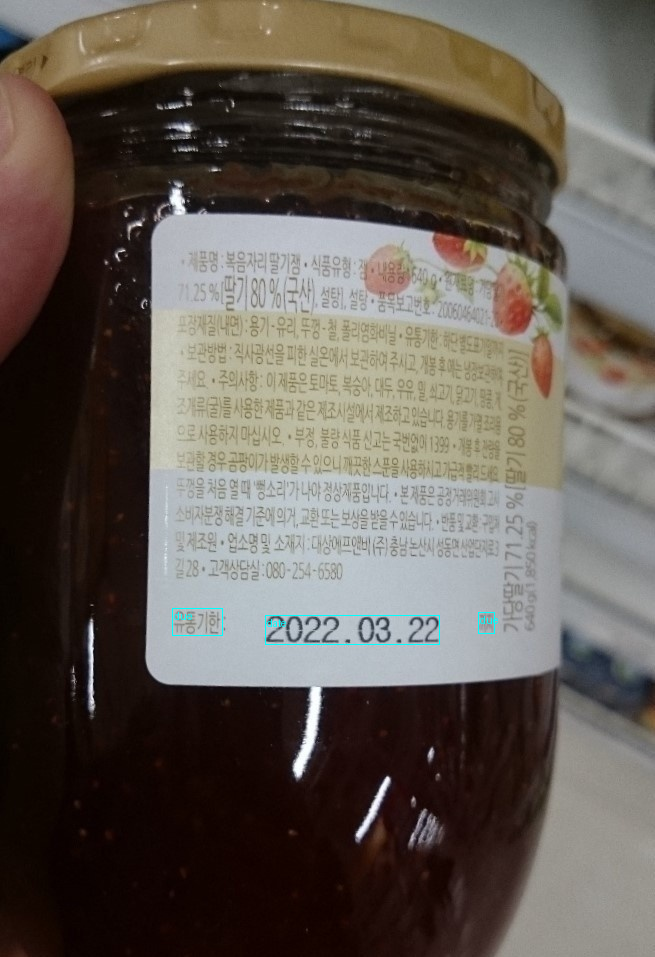

In [3]:
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
from PIL import Image
import random

# Accessing categories from the dataset
categories = hf_dataset.features["categories"].feature

# Take one random example from the dataset
example = hf_dataset[random.randint(0, hf_dataset.num_rows)]

# Open the image and convert it to RGB mode
image = Image.open(example["image_path"]).convert("RGB")

# Extracting labels and bounding boxes from the example
labels = [categories.int2str(x) for x in example['categories']]
boxes_xyxy = torch.tensor(example['bboxes_block'])

# Printing image id, bounding box coordinates, width, and height
print("image id: ", example["id"])
print("bboxes_block: ", example["bboxes_block"])
print("width, height: ", example["width"], example["height"])

# Drawing bounding boxes on the image
to_pil_image(
    draw_bounding_boxes(
        pil_to_tensor(image),
        boxes_xyxy,
        colors="cyan",
        labels=labels,
    )
)

Now let's test the latest trained model

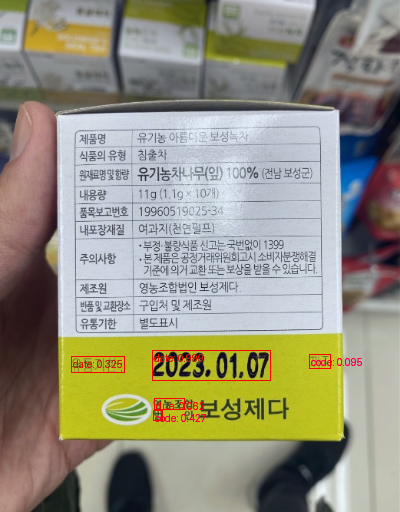

In [11]:
import sys
sys.path.append('../')

from src.exp_date_recognition.detection.detect import detect
from src.exp_date_recognition.detection.model.resnet50 import get_model_instance

example = hf_dataset[random.randint(0, hf_dataset.num_rows)]
image = Image.open(example["image_path"]).convert("RGB")

# load the model
template_path = "../src/exp_date_recognition/detection/model/checkpoints/resnet50_exp_date_{version}.pt"
model = get_model_instance(4, True, "latest", template_path)

annotated_image, bboxes, labels = detect(model, image, categories=categories)

# Drawing bounding boxes on the image
to_pil_image(
    draw_bounding_boxes(
        annotated_image,
        bboxes,
        colors="red",
        labels=labels,
    )
)